In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import datetime, time 

In [46]:
df = pd.read_excel('../new_data/2_id_market_edit.xlsx')
df

,SAP,№ маг,ЦФО ВРС,Город,Улица
0,7083,8540,13CT7083,г.Тверь,"г.Тверь, Веселова ул., 25 н.п.I"
1,7084,8573,13CT7084,г.Тверь,"г.Тверь, Николая Корыткова пр-кт, 3Б"
2,7005,8169,13CT7005,г.Конаково,"г.Конаково, Энергетиков ул., 28"
3,7006,8251,13CT7006,г.Конаково,"г.Конаково, Фаянсовый завод ул., 13"
4,6993,8244,13CT6993,г.Калязин,"г.Калязин, Коминтерна ул., 51/14"
...,...,...,...,...,...
1718,33K3,20974,E1045872,г.Апатиты,"г.Апатиты, Ферсмана ул, 39"
1719,33OH,14011,E1046348,г.Псков,"г.Псков, Яна Райниса ул, 22Б"
1720,33VX,21646,E1047555,г.Сегежа,"г.Сегежа, Антикайнена ул, 11"
1721,33XK,21687,E1047771,г.Санкт-Петербург,"г.Санкт-Петербург, Королёва пр-кт, 7 л.А,ч.п7-Н"


In [47]:
np_df = np.array(df)
np_df

array([[7083, 8540, '13CT7083', 'г.Тверь',
        'г.Тверь, Веселова ул., 25 н.п.I'],
       [7084, 8573, '13CT7084', 'г.Тверь',
        'г.Тверь, Николая Корыткова пр-кт, 3Б'],
       [7005, 8169, '13CT7005', 'г.Конаково',
        'г.Конаково, Энергетиков ул., 28'],
       ...,
       ['33VX', 21646, 'E1047555', 'г.Сегежа',
        'г.Сегежа, Антикайнена ул, 11'],
       ['33XK', 21687, 'E1047771', 'г.Санкт-Петербург',
        'г.Санкт-Петербург, Королёва пр-кт, 7 л.А,ч.п7-Н'],
       ['33XL', 21714, 'E1047777', 'г.Санкт-Петербург',
        'г.Санкт-Петербург, Ленинский пр-кт, 128 к.2,л.А']], dtype=object)

In [48]:
cities = np.array(df['Город'])
cities

array(['г.Тверь', 'г.Тверь', 'г.Конаково', ..., 'г.Сегежа',
       'г.Санкт-Петербург', 'г.Санкт-Петербург'], dtype=object)

In [75]:


def which_town(text):
    type_city = text.split('.')[0]
    if type_city =='г':
        return 'город'
    elif type_city == 'гп' or type_city =='пгт' or type_city =='п' or type_city =='с/п':
        return 'поселок'
    elif type_city =='с':
        return 'село'
    elif type_city =='д':
        return 'деревня'

arr = [[],[],[],[]]
for i in range(len(np_df)):
    arr[0].append(df['ЦФО ВРС'][i])
    arr[1].append(df['SAP'][i])
    arr[2].append(df['Город'][i])
    arr[3].append(which_town(df['Город'][i]))

new_df_cities = pd.DataFrame()
new_df_cities['МВЗ'] = arr[0]
new_df_cities['SAP'] = arr[1]
new_df_cities['Населенный пункт'] = arr[2]
new_df_cities['Тип'] = arr[3]
new_df_cities = new_df_cities[new_df_cities['Тип']!='None']
new_df_cities

,МВЗ,SAP,Населенный пункт,Тип
0,13CT7083,7083,г.Тверь,город
1,13CT7084,7084,г.Тверь,город
2,13CT7005,7005,г.Конаково,город
3,13CT7006,7006,г.Конаково,город
4,13CT6993,6993,г.Калязин,город
...,...,...,...,...
1718,E1045872,33K3,г.Апатиты,город
1719,E1046348,33OH,г.Псков,город
1720,E1047555,33VX,г.Сегежа,город
1721,E1047771,33XK,г.Санкт-Петербург,город


In [76]:
print('Город')
new_df_cities[new_df_cities["Тип"] == 'город'][:10]

Город


,МВЗ,SAP,Населенный пункт,Тип
0,13CT7083,7083,г.Тверь,город
1,13CT7084,7084,г.Тверь,город
2,13CT7005,7005,г.Конаково,город
3,13CT7006,7006,г.Конаково,город
4,13CT6993,6993,г.Калязин,город
5,13CT6995,6995,г.Кимры,город
6,13CT6940,6940,г.Тверь,город
7,13CT6450,6450,г.Конаково,город
8,13CT5283,5283,г.Кимры,город
9,13CT5284,5284,г.Кимры,город


In [77]:
print('Поселок')
new_df_cities[new_df_cities["Тип"] == 'поселок'][:10]

Поселок


,МВЗ,SAP,Населенный пункт,Тип
36,E1005505,9142,пгт.Максатиха,поселок
43,E1007489,9822,п.Пено,поселок
52,E1007795,3812,п.Спирово,поселок
55,E1007583,3416,п.Эммаусс,поселок
56,E1008855,4548,пгт.Селижарово,поселок
81,E1012677,G722,пгт.Фирово,поселок
83,E1012588,J051,пгт.Новозавидовский,поселок
85,E1012731,G723,п.Жарковский,поселок
86,E1012940,J052,пгт.Новозавидовский,поселок
103,E1015204,X356,"гп.Конаково, г.Конаково",поселок


In [78]:
print('Село')
new_df_cities[new_df_cities["Тип"] == 'село'][:10]

Село


,МВЗ,SAP,Населенный пункт,Тип
71,E1011637,Q574,с.Медное,село
395,13SZ5716,5716,с.Русско-Высоцкое,село
460,13SZ6255,6255,с.Паша,село
539,E1001561,7867,с.Мошенское,село
572,E1004261,8052,с.Павлово,село
580,E1004251,8149,с.Середка,село
634,E1004249,8384,с.Рождествено,село
643,13SZI094,8908,с.Шум,село
660,E1004866,8927,с.Колчаново,село
693,E1005474,9352,с.Усть-Луга,село


In [79]:
new_df_cities[new_df_cities["Тип"] == 'деревня'][:10]

,МВЗ,SAP,Населенный пункт,Тип
265,13SZ5584,5584,д.Горбунки,деревня
393,13SZ5696,5696,д.Борисовичи,деревня
417,13SZ5695,5695,д.Юкки,деревня
437,13SZ6025,6025,д.Бегуницы,деревня
470,13SZ6432,6432,д.Кипень,деревня
472,13SZ6381,6381,д. Нурма,деревня
476,13SZ6434,6434,д.Федоровское,деревня
480,13SZ6474,6474,д.Малое Карлино,деревня
498,13SZ7276,7276,д.Кисельня,деревня
528,13SZ7742,7742,д.Большие Колпаны,деревня


# А теперь найденные населенные пункты сравним с имеющимся списком временных рядов по магазинам.

In [81]:
df_sell_all_market = pd.read_excel('../data/5.sells_all_market_per_time.xlsx')


In [82]:
df_sell_all_market[:1]

,кластер,ЦФО (НА),Дата открытия,Дата закрытия|Календарный день,01.07.2018,02.07.2018,03.07.2018,04.07.2018,05.07.2018,06.07.2018,...,21.06.2021,22.06.2021,23.06.2021,24.06.2021,25.06.2021,26.06.2021,27.06.2021,28.06.2021,29.06.2021,30.06.2021
0,Кластер Северо-Запад 01 ЛО Волхов-Тихвин,13SZ5597,21.02.2007,#,347887.11,422294.93,458349.71,385125.35,431917.71,484593.82,...,408915.9,414673.64,431250.19,459223.56,529554.21,338798.05,354198.1,461161.56,383900.1,509057.2


In [87]:

book_mvz = dict(zip(new_df_cities["МВЗ"],new_df_cities['Тип']))
df_sell_all_market =  df_sell_all_market[df_sell_all_market['ЦФО (НА)'].isin(new_df_cities['МВЗ'])]
df_sell_all_market['Тип'] = [book_mvz.get(i) for i in df_sell_all_market['ЦФО (НА)']]
df_sell_all_market[['Тип','ЦФО (НА)','кластер']]

,Тип,ЦФО (НА),кластер
0,город,13SZ5597,Кластер Северо-Запад 01 ЛО Волхов-Тихвин
1,город,13SZ5619,Кластер Северо-Запад 01 ЛО Волхов-Тихвин
2,город,13SZ5631,Кластер Северо-Запад 01 ЛО Волхов-Тихвин
3,город,13SZ5633,Кластер Северо-Запад 01 ЛО Волхов-Тихвин
4,город,13SZ5638,Кластер Северо-Запад 01 ЛО Волхов-Тихвин
...,...,...,...
1680,город,E1030560,Кластер Северо-Запад 19 СПБ-Охта
1682,город,E1037433,Кластер Северо-Запад 19 СПБ-Охта
1683,город,E1039436,Кластер Северо-Запад 19 СПБ-Охта
1684,город,E1043633,Кластер Северо-Запад 19 СПБ-Охта


In [103]:
date = [datetime.datetime.strptime(i, "%d.%m.%Y").date() for i in df_sell_all_market.columns[4:][:-1]]
np_sells=  np.array(df_sell_all_market[df_sell_all_market.columns[4:][:-1]])

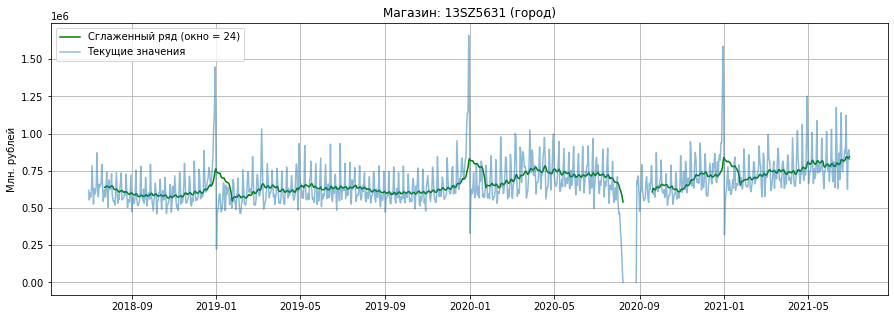

In [118]:
def draw_market_sells(i):
  plt.figure(figsize=(15,8))
  plt.title(f'Магазин: {df_sell_all_market["ЦФО (НА)"][i]} ({df_sell_all_market["Тип"][i]})')
  plt.ylabel('Млн. рублей')
  plt.plot(date, np_sells[i]/1000000)
  plt.show()

def plotMovingAverage(i, n):
    
    rolling_mean = pd.Series(np_sells[i]).rolling(window=n).mean()
    plt.figure(figsize=(15,5))
    plt.title(f'Магазин: {df_sell_all_market["ЦФО (НА)"][i]} ({df_sell_all_market["Тип"][i]})')
    plt.plot(date,rolling_mean, "g", label=f"Сглаженный ряд (окно = {n})")

    plt.plot(date,np_sells[i], label="Текущие значения", alpha = 0.5)
    plt.ylabel('Млн. рублей')
    plt.legend(loc="upper left")
    plt.grid(True)
plotMovingAverage(i, 24)

In [126]:
df_sell_all_market[df_sell_all_market["Тип"] == 'город'][:5][['Тип','ЦФО (НА)']]

,Тип,ЦФО (НА)
0,город,13SZ5597
1,город,13SZ5619
2,город,13SZ5631
3,город,13SZ5633
4,город,13SZ5638


In [127]:
df_sell_all_market[df_sell_all_market["Тип"] == 'поселок'][:5][['Тип','ЦФО (НА)']]

,Тип,ЦФО (НА)
16,поселок,13SZ6245
25,поселок,13SZ7641
28,поселок,E1001660
30,поселок,E1004230
31,поселок,E1004255


In [129]:
df_sell_all_market[df_sell_all_market["Тип"] == 'село'][:5][['Тип','ЦФО (НА)']]

,Тип,ЦФО (НА)
17,село,13SZ6255
34,село,E1004866
59,село,E1011075
114,село,E1004261
216,село,E1031576


In [131]:
df_sell_all_market[df_sell_all_market["Тип"] == 'деревня'][:5][['Тип','ЦФО (НА)']]

,Тип,ЦФО (НА)
22,деревня,13SZ7276
32,деревня,E1004259
46,деревня,E1008415
120,деревня,E1006429
129,деревня,E1012958


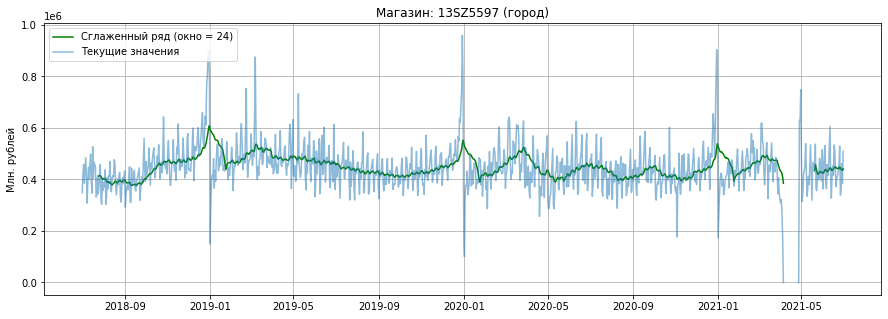

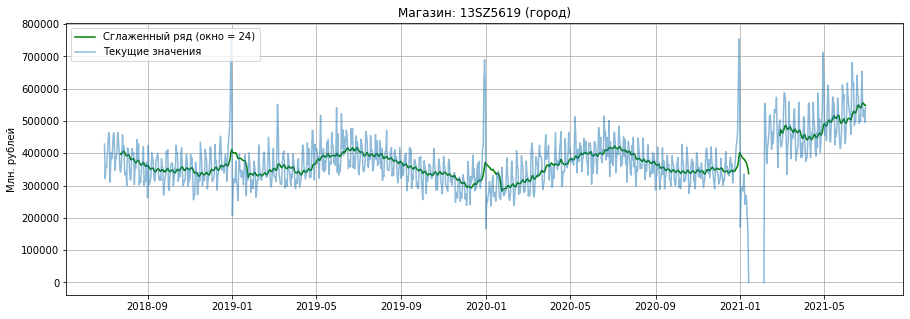

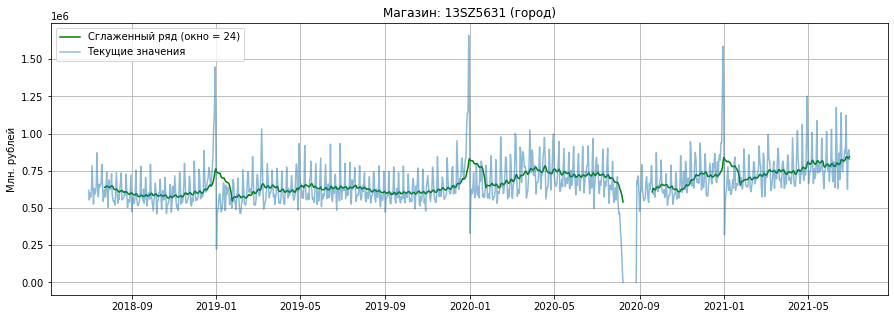

In [132]:
for i in [0,1,2]:
    plotMovingAverage(i, 24)

## Графики выше ближе к стационарным. Имеется явный пик зимой. Имеются праздничные сез

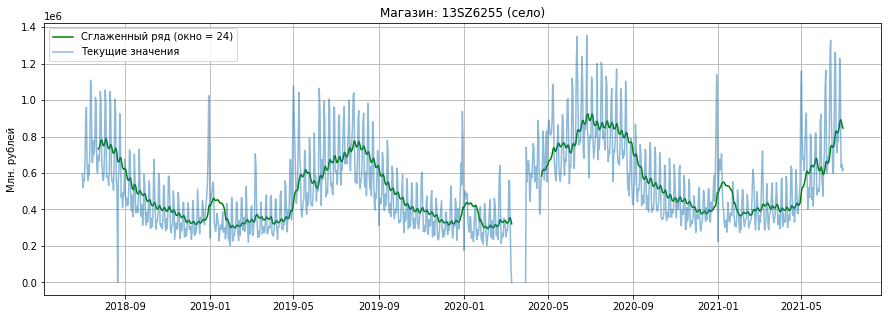

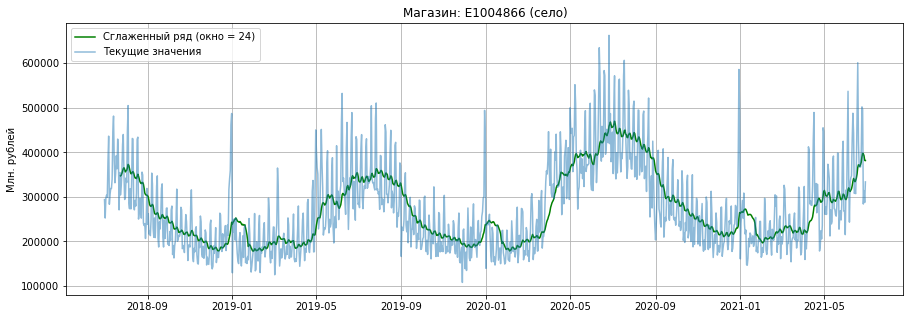

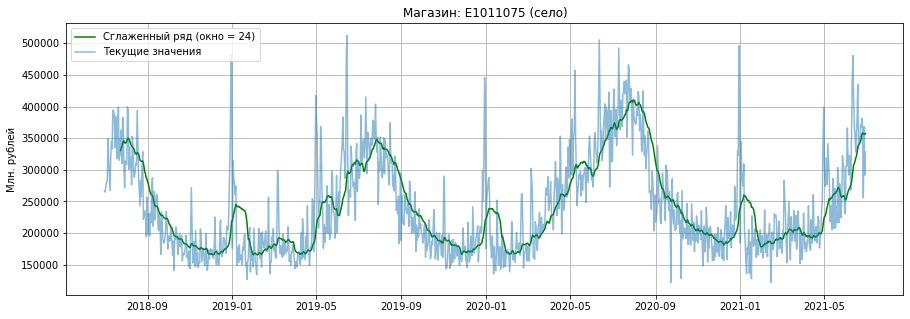

In [133]:
for i in [17,34,59]:
    plotMovingAverage(i, 24)

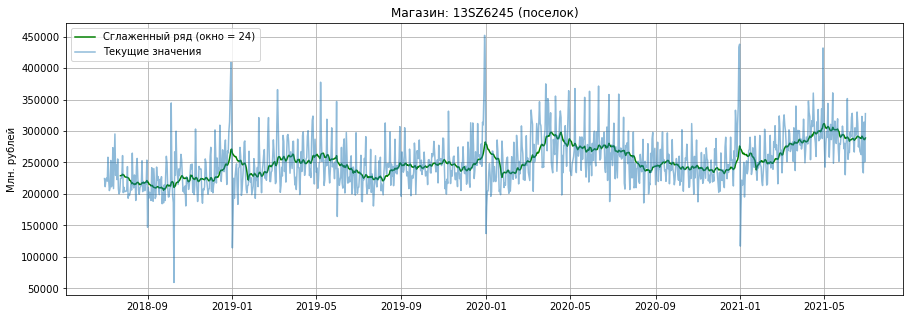

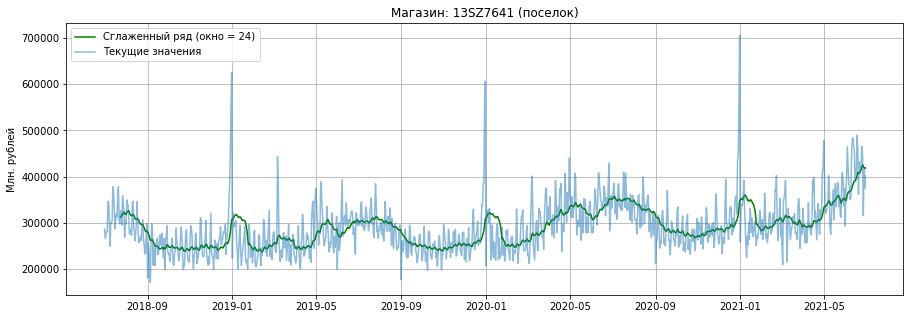

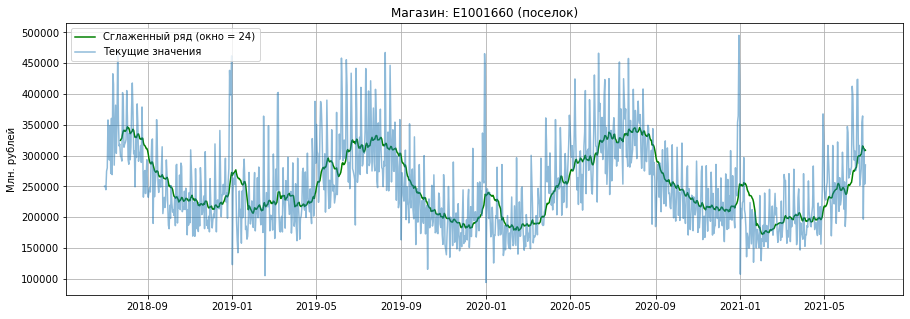

In [134]:
for i in [16,25,28]:
    plotMovingAverage(i, 24)

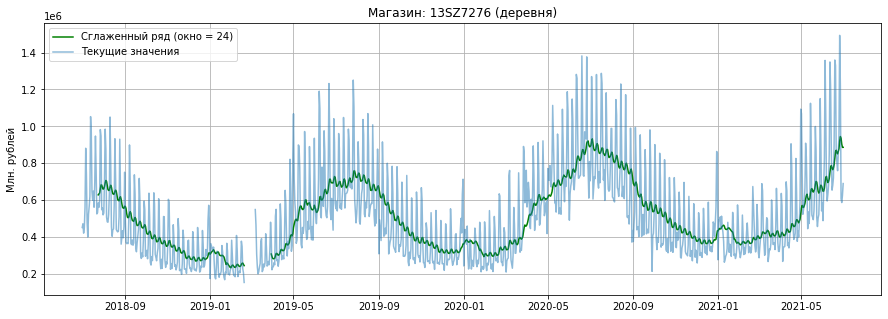

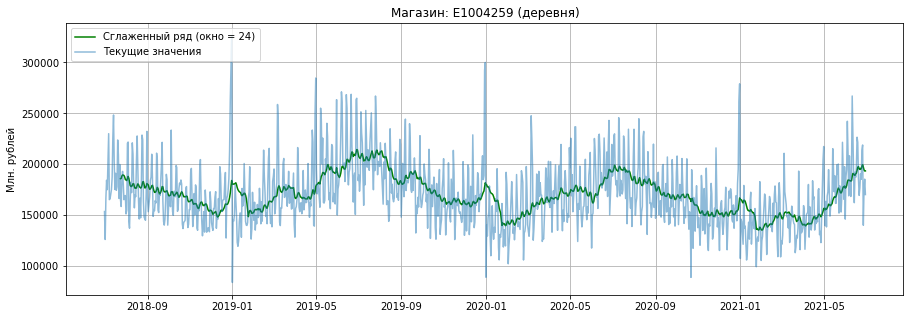

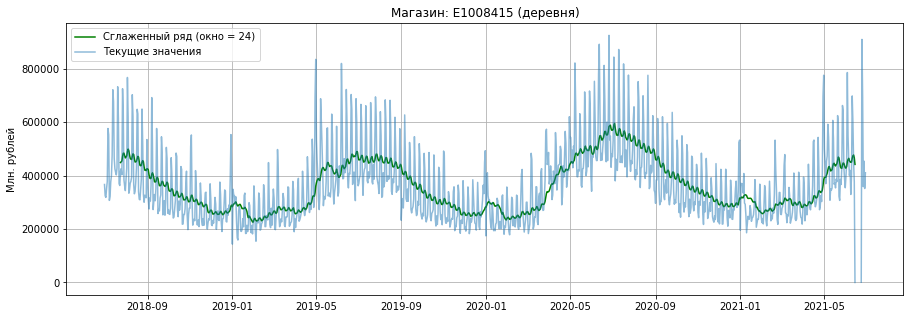

In [135]:
for i in [22,32,46]:
    plotMovingAverage(i, 24)